[View in Colaboratory](https://colab.research.google.com/github/UjjwalSaxena/road-glare-removal-tests/blob/master/mapping.ipynb)

In [0]:
# !pip install moviepy
# import cv2
# import time
# import matplotlib.pyplot as plt
# import moviepy
# from moviepy.editor import VideoFileClip
# import glob
# %matplotlib inline
# import numpy as np

In [105]:
# def upload_files():
#   from google.colab import files
#   uploaded = files.upload()
#   for k, v in uploaded.items():
#     open(k, 'wb').write(v)
#   return list(uploaded.keys())

# upload_files()
!ls -lrt
# !mv "VID_20180905_191714382.mp4" "test.mp4"

# !mkdir "video_frames"

total 9848
drwxr-xr-x 2 root root     4096 Aug 31 20:42 sample_data
-rw-r--r-- 1 root root 10079771 Sep  5 14:02 test.mp4


In [0]:

def process(curr,next):
  return cv2.calcOpticalFlowFarneback(curr,next, None, 0.5, 3, 15, 3, 5, 1.2, 0)   #pyr_scale, levels, winsize, iterations, poly_n, poly_sigma, flags

-5
-24
-32
-31
-28
-29
-30
-24
-30
-27
-26
-10
-21
-16


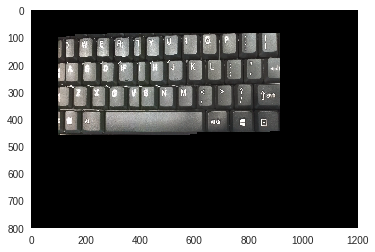

In [129]:
import cv2 as cv
cap = cv.VideoCapture('test.mp4')
blank_image = np.zeros((800,1200,3), np.uint8)
# Parameters for lucas kanade optical flow
lk_params = dict( winSize  = (15,15),
                  maxLevel = 2,
                  criteria = (cv.TERM_CRITERIA_EPS | cv.TERM_CRITERIA_COUNT, 10, 0.03))
# Create some random colors
color = np.random.randint(0,255,(100,3))
# Take first frame and find corners in it
ret, old_frame = cap.read()
old_frame=cv.resize(old_frame,(480,360))
offsetx=100
offsety=100

old_gray = cv.cvtColor(old_frame, cv.COLOR_BGR2GRAY)
ho,wo= old_gray.shape[0],old_gray.shape[1]
blank_image[offsety:offsety+ho,offsetx:offsetx+wo,:]=old_frame
n=10
pl0 = np.asarray([[[wo/n,ho*(n/5)/n]],[[wo/n,ho*(n/4)/n]],[[wo/n,ho*(n/3)/n]],[[wo/n,ho*(n/2)/n]],[[wo/n,ho*(n/1.5)/n]]])
pl0 = np.array(pl0).reshape(-1,1,2).astype(np.float32) 
pr0 = np.asarray([[[wo*(n-1)/n,ho*(n/5)/n]],[[wo*(n-1)/n,ho*(n/4)/n]],[[wo*(n-1)/n,ho*(n/3)/n]],[[wo*(n-1)/n,ho*(n/2)/n]],[[wo*(n-1)/n,ho*(n/1.5)/n]]])
pr0 = np.array(pr0).reshape(-1,1,2).astype(np.float32)

# Create a mask image for drawing purposes
# mask = np.zeros_like(old_frame)
counter=0

while(ret):
    counter+=1
    ret,frame = cap.read()
    if(counter%9!=0 or ret==False):
      continue
    
#     print(ret)
    frame= cv.resize(frame,(480,360))
    frame_gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    # calculate optical flow
    pl1, stl, errl = cv.calcOpticalFlowPyrLK(old_gray, frame_gray, pl0, None, **lk_params)
    pr1, str, errr = cv.calcOpticalFlowPyrLK(old_gray, frame_gray, pr0, None, **lk_params)
#     print(pl1)
    good_newl = pl1[stl==1]
    good_oldl = pl0[stl==1]
    good_newr = pr1[str==1]
    good_oldr = pr0[str==1]
   
    x_diflection=int(np.mean(good_newr[:,0]))-int(np.mean(good_oldr[:,0]))
    y_diflection=int(np.mean(good_newr[:,1]))-int(np.mean(good_oldr[:,1]))
    print(x_diflection)
    offsety-=y_diflection
    offsetx-=x_diflection
    blank_image[offsety:offsety+ho,offsetx:offsetx+wo,:]=frame
    old_gray = frame_gray.copy()
    pl0 = good_newl.reshape(-1,1,2)
    pr0 = good_newr.reshape(-1,1,2)
    
    
cv.destroyAllWindows()
cap.release()


plt.imshow(blank_image)
plt.grid(False)

In [0]:
    # draw the tracks
#     for i,(new,old) in enumerate(zip(good_new,good_old)):
#         a,b = new.ravel()
#         c,d = old.ravel()
#         mask = cv.line(mask, (a,b),(c,d), color[i].tolist(), 2)
#         frame = cv.circle(frame,(a,b),5,color[i].tolist(),-1)
#     img = cv.add(frame,mask)
#     plt.imshow(img)
#     k = cv.waitKey(30) & 0xff
#     if k == 27:
#         break
    # Now update the previous frame and previous points